In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#Load the data 
sales=pd.read_excel("Data/Superstore_Sales_Records.xls")

In [4]:
sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


Basic EDA

In [5]:
print(f'total_number of rows :{sales.shape[0]}')
print(f'total_number of rows :{sales.shape[1]}')

total_number of rows :9994
total_number of rows :21


In [7]:
sales.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
#Select the relevant column for tha sales analysis

sales=sales[['Order Date','Category','Sales']]

In [9]:
sales.head(3)

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.96
1,2016-11-08,Furniture,731.94
2,2016-06-12,Office Supplies,14.62


In [11]:
#get over all summary 
sales.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101


In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Category    9994 non-null   object        
 2   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


In [15]:
sales.isnull().sum()

Order Date    0
Category      0
Sales         0
dtype: int64

**check Distinct Value**

In [16]:
sales.nunique()

Order Date    1237
Category         3
Sales         6144
dtype: int64

In the whole data set we have only three categories

In [17]:
#Display the category and their frequency
sales['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [18]:
#Set Order Date as Index

sales["Order Date"]=pd.to_datetime(sales['Order Date'])
sales.set_index("Order Date", inplace=True)

In [19]:
sales.head(3)

,Category,Sales
Order Date,,
2016-11-08,Furniture,261.96
2016-11-08,Furniture,731.94
2016-06-12,Office Supplies,14.62


In [21]:
#Range of the date 
min_date=sales.index.min()
max_date=sales.index.max()

print(f'the minimum order date is: {min_date}')
print(f'the maximum order date is: {max_date}')
print(f'Total time span {(max_date.year-min_date.year)} years')

the minimum order date is: 2014-01-03 00:00:00
the maximum order date is: 2017-12-30 00:00:00
Total time span 3 years


Time resampling

Resampling is the for frequency conversion and resampling of time series. So if you need to change the data from daily frequency to monthly or yearly we can resample the data accordingly.

In pandas we have resampling functionm resample(). When calling .resample() we need to pass in a rule parameter, then we need to call some aggregate functions.

The rule parameter describes the frequency with which to apply the agg function(daily, monthly yearly etc).

Note that we need to apply some aggregate function after resampling because after resampling we need to join the rows (mean, sum, count etc.)

In [24]:
sales_samples=pd.read_excel("Data/Superstore_Sales_Records.xls")


Down sampling 

In [25]:
sales_samples=sales_samples[sales_samples["Category"]=='Furniture']
sales_samples.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [29]:
sales_samples=sales_samples.reset_index().groupby(by=['Order Date']).agg({'Sales':sum})
sales_samples.sort_index(inplace=True)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1994/1593563490.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_samples=sales_samples.reset_index().groupby(by=['Order Date']).agg({'Sales':sum})


In [ ]:
sales_samples.head(5)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


Above data does not seem to have daily or weekly records. There seems some discontinuties.

We can use resampling technique to make it on monthly level like start date of each month.

In [31]:
sales_samples_monthly=sales_samples.resample('MS').mean()
sales_samples_monthly.head(5)

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


Plot

Let's visualize raw data and data after resampling over MS freque

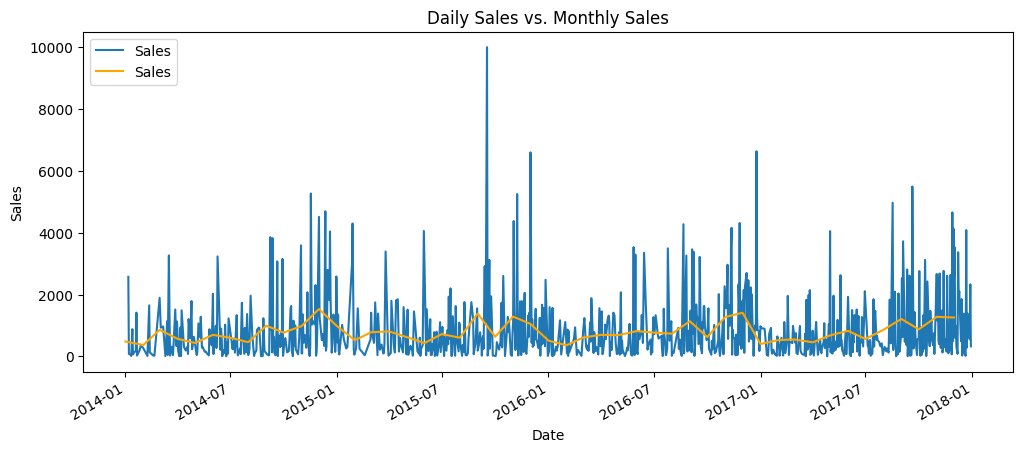

In [32]:
fig,ax=plt.subplots(figsize=(12,5))

sales_samples.plot(ax=ax,label="per  day sales date")

sales_samples_monthly.plot(ax=ax, label="per month sales date",color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Daily Sales vs. Monthly Sales')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

Resampled data seems to have some nice pattern wrt the raw sales data.

In Pandas, we have many inbuilt rules like I used MS rule in above cell. We can also make it on yealy level or even daily level using inbuilt rules. For aggregate functions(min/max/sum etc) we can also define custom aggregators by our own

Let see a custom rule 

In [33]:
def first_day(entry):
    """
        Returns the first isnatnce of the period, regardless of sampling rate
    """
    if(len(entry)):

        return entry[0]

In [35]:
sales_samples.resample("A").apply(first_day)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1994/2158675374.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  sales_samples.resample("A").apply(first_day)
/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1994/1047241003.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Sales
Order Date,
2014-12-31,2573.82
2015-12-31,452.45
2016-12-31,173.94
2017-12-31,975.49


Time upsampling

In this we resample to shorter time frame, for example monthly data to weekly/biweekly/daily etc. Because of this, many bins are created with NaN values and to fill these there are different methods that can be used as pad method and bfill method.

Let's try to upsample monthly sales data to weekly and then visualize the resulatnt plot.

In [41]:
sales_samples_weekly=sales_samples_monthly.resample("W").bfill()

In [44]:
sales_samples_monthly.shape

(48, 1)

In [43]:
sales_samples_weekly.shape

(205, 1)

In [45]:
sales_samples_weekly.head()

,Sales
Order Date,
2014-01-05,367.931600
2014-01-12,367.931600
2014-01-19,367.931600
2014-01-26,367.931600
2014-02-02,857.291529


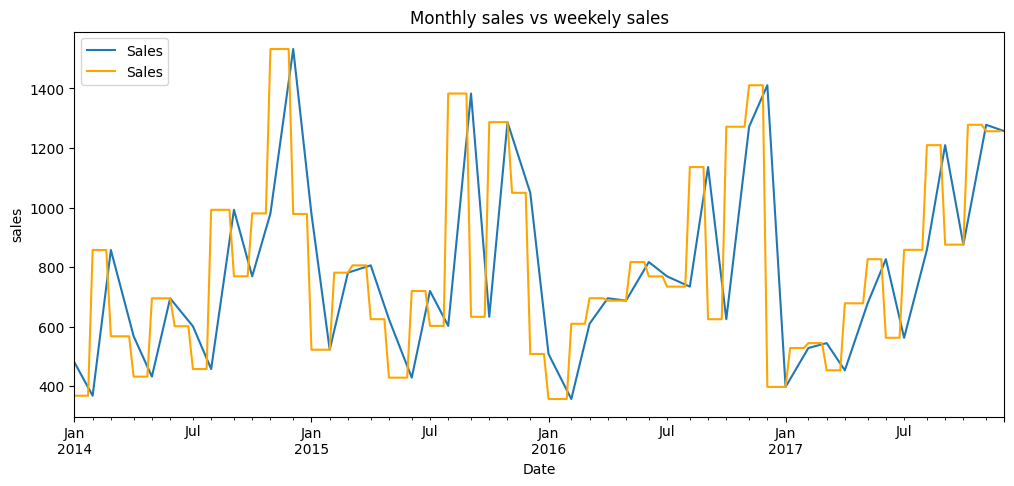

In [47]:
fig,ax=plt.subplots(figsize=(12,5))

#monthly sales 
sales_samples_monthly.plot(ax=ax, label="Monthly sales date")

#weekly sales
sales_samples_weekly.plot(ax=ax,label="weekly sales date", color="orange")

ax.set_xlabel("Date")
ax.set_ylabel('sales')
ax.set_title('Monthly sales vs weekely sales')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='upper left')


Time Shifting

Sometimes we may need to shift all the data up or down along the time series index. We can use pandas in built method shift() to accomplished that

In [48]:
sales=pd.read_excel("data/Superstore_Sales_Records.xls")

In [49]:
sales_furniture=sales[sales['Category']=='Furniture']
sales_furniture=sales_furniture.groupby(by="Order Date").agg({'Sales':sum})
sales_furniture.sort_index(inplace=True)
sales_furniture.head(5)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1994/3401200651.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_furniture=sales_furniture.groupby(by="Order Date").agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [50]:
#resampling it on monthly level 

sales_furniture=sales_furniture.resample("MS").mean()
sales_furniture.head(5)

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [51]:
#shift time period by 1 

sales_furniture["lag_1"]=sales_furniture.shift(periods=1)
sales_furniture.head()

,Sales,lag_1
Order Date,,
2014-01-01,480.194231,NaN
2014-02-01,367.931600,480.194231
2014-03-01,857.291529,367.931600
2014-04-01,567.488357,857.291529
2014-05-01,432.049188,567.488357


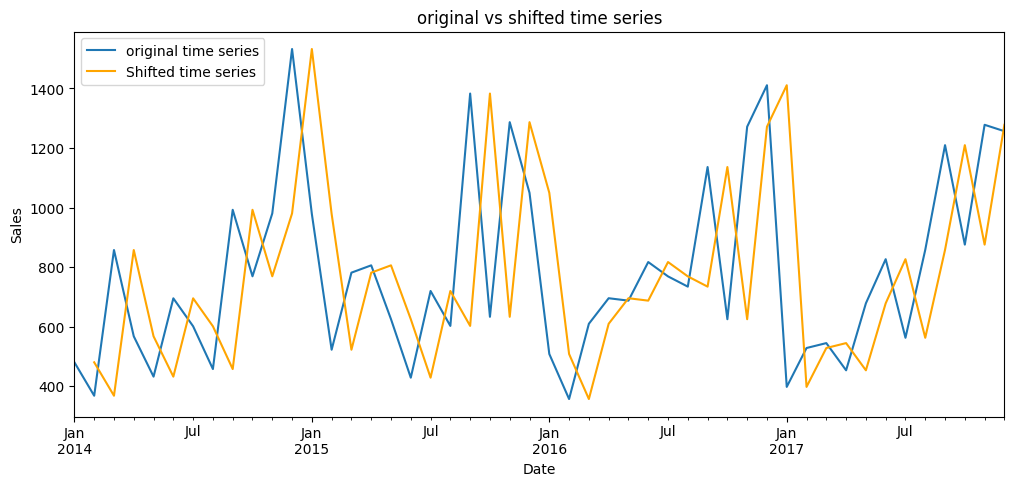

In [77]:
fig,ax=plt.subplots(figsize=(12,5))

sales_furniture["Sales"].plot(ax=ax, label="original time series")

sales_furniture["lag_1"].plot(ax=ax, label='Shifted time series', color="orange")

ax.set_xlabel("Date")
ax.set_ylabel('Sales')
ax.set_title("original vs shifted time series")
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='upper left')


In [55]:

sales_furniture.head()

,Sales,lag_1
Order Date,,
2014-01-01,480.194231,NaN
2014-02-01,367.931600,480.194231
2014-03-01,857.291529,367.931600
2014-04-01,567.488357,857.291529
2014-05-01,432.049188,567.488357


Rolling window mean

The rolling average or moving average is simple mean of of last n values. It can help us in finding trends that would be otherwise hard to detect.

df.rolling(n).mean(n)  where n - window size

The main idea is to divide the data into windows to time, and then calculate an aggregate function for each window. In this way we obtain a simple moving avearge.

Let's look at sales data of furniture and try to calculate the rolling mean for it.

In [65]:
sales_data=pd.read_excel("Data/Superstore_Sales_Records.xls",index_col="Order Date", parse_dates=True)
sales_data.head(5)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [67]:
sales_furn=sales_data[sales_data['Category']=="Furniture"]

sales_furn.head(5)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [68]:
sales_furn=sales_furn.sort_index()

sales_furn=sales_furn[["Sales"]]

sales_furn.head(5)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [69]:
sales_furn=sales_furn.groupby(by=["Order Date"]).agg({"Sales":sum})
sales_furn.head(5)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1994/3963939802.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_furn=sales_furn.groupby(by=["Order Date"]).agg({"Sales":sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


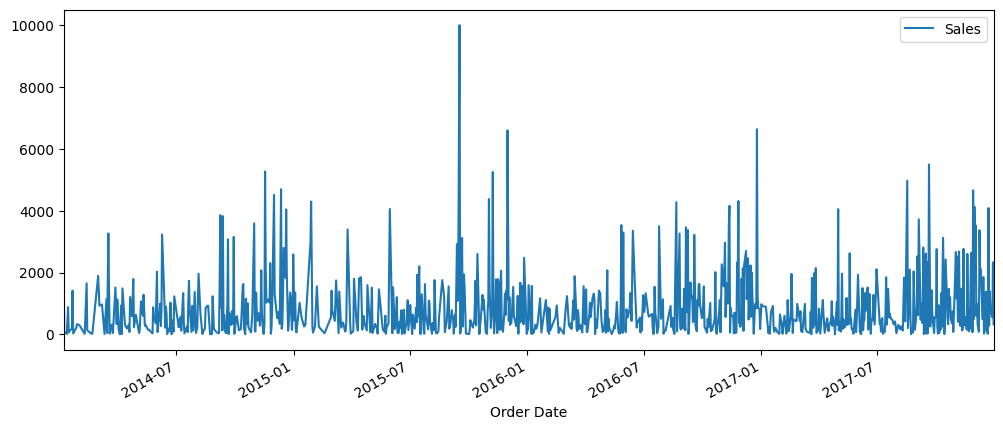

In [70]:
sales_furn.plot(figsize=(12,5)).autoscale(axis='x',tight=True)

This seems messy. Let's try to resample data over monthly basis and then try to visualize the graph.

In [72]:
sales_furn=sales_furn.resample("MS").mean()
sales_furn.head(5)

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


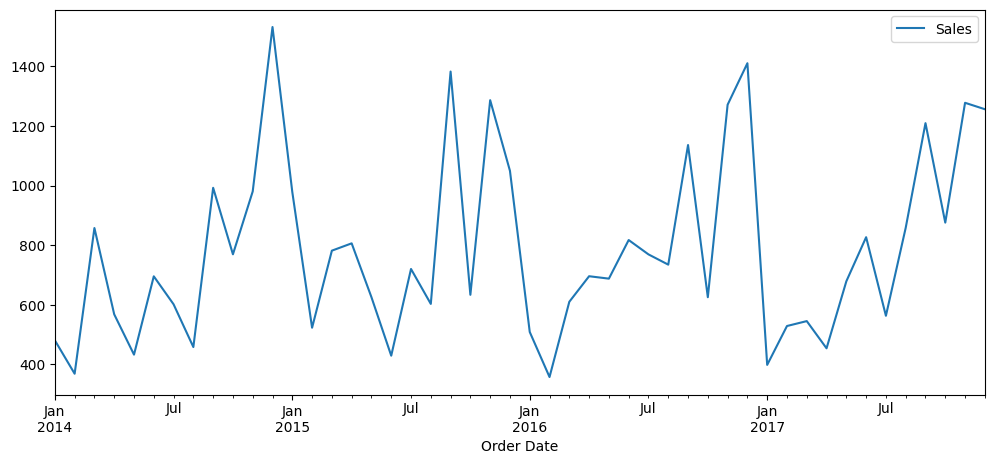

In [73]:
sales_furn.plot(figsize=(12,5)).autoscale(axis="x",tight=True)

Now this seems to have some pattern. Here we have plotted the Sales of Furnitures on monthly frequency like for at start of each month what is the Sales.

Now let's see the rolling mean of Sales data and I will be plotting the data in the same view since it will be much easier to visualiza and compare. I will be taking the window size as 3 which basically is per quarter.

In [74]:
sales_furn["Quaterly_sale"]=sales_furn["Sales"].rolling(window=3).mean()
sales_furn.head(5)

,Sales,Quaterly_sale
Order Date,,
2014-01-01,480.194231,NaN
2014-02-01,367.931600,NaN
2014-03-01,857.291529,568.472453
2014-04-01,567.488357,597.570496
2014-05-01,432.049188,618.943025


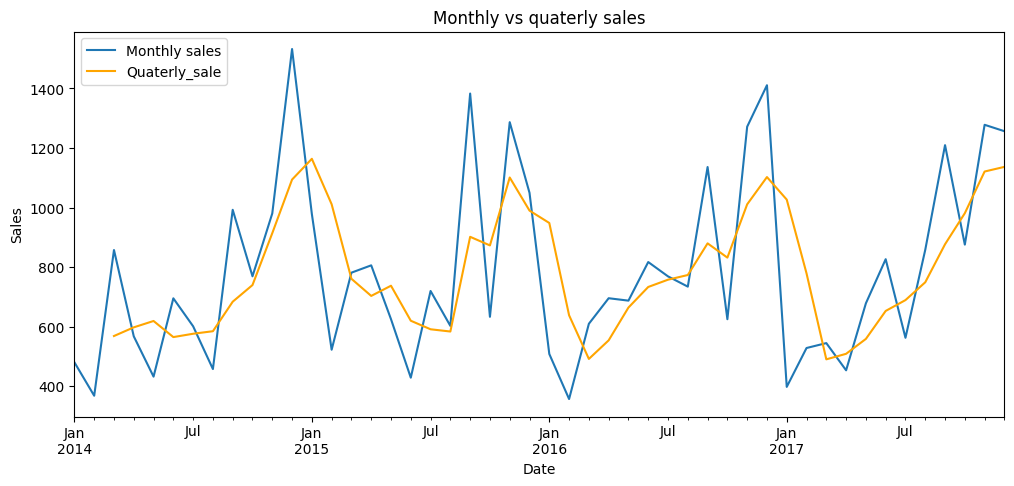

In [76]:
fig,ax=plt.subplots(figsize=(12,5))

sales_furn["Sales"].plot(ax=ax, label="Monthly sales")

sales_furn["Quaterly_sale"].plot(ax=ax, label='Quaterly_sale', color="orange")

ax.set_xlabel("Date")
ax.set_ylabel('Sales')
ax.set_title("Monthly vs quaterly sales")
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='upper left')
plt.show()

Expanding window

Expanding window, also known as a cumulative moving window, is a concept used in time series analysis to calculate various statistics over a growing portion of the data as the window expands.

This can be particularly useful for understanding trends and patterns in a time series over time.

Plot the cumulative average sales of each quater.

In [79]:
sales_furn["Expanding mean"]=sales_furn["Sales"].expanding(min_periods=3).mean()

sales_furn.head(10)

,Sales,Quaterly_sale,Expanding mean
Order Date,,,
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.931600,NaN,NaN
2014-03-01,857.291529,568.472453,568.472453
2014-04-01,567.488357,597.570496,568.226429
2014-05-01,432.049188,618.943025,540.990981
2014-06-01,695.059242,564.865596,566.669024
2014-07-01,601.169500,576.092643,571.597664
2014-08-01,457.521656,584.583466,557.338163
2014-09-01,992.353367,683.681508,605.673186


In Pandas, this is calculated using expanding().mean(). Here's how it works:

For January, it’s just the sales value of January itself.

For February, it’s the mean of January and February.

For March, it’s the mean of January, February, and March.

For April, it’s the mean of all the sales from January to April, and so on.

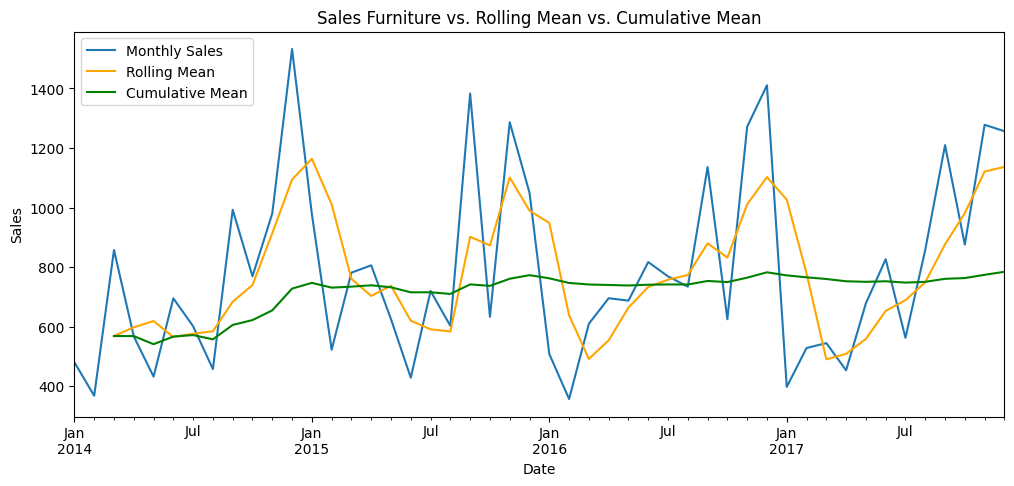

In [83]:
fig, ax = plt.subplots(figsize=(12, 5))
# Plot the sales_furniture data
sales_furn['Sales'].plot(ax=ax, label='Monthly Sales')

# Plot the sales_furniture rolling mean
sales_furn['Quaterly_sale'].plot(ax=ax, label='Rolling Mean', color='orange')

# Plot the sales_furniture cumulative mean
sales_furn['Expanding mean'].plot(ax=ax, label='Cumulative Mean', color='green')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Furniture vs. Rolling Mean vs. Cumulative Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()

This can be calculated using rolling(window=3).mean() in Pandas. Here's a brief explanation:

For January, February, and March, there are not enough data points to calculate the quarterly average, so it's NaN for the first two months.

For March, it’s the average of January, February, and March.

For April, it’s the average of February, March, and April, and so on.